<a href="https://colab.research.google.com/github/Roy-Subhankar/Credit-Card-Default-Prediction/blob/main/Subhankar_Roy_Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project Title : Predicting whether a customer will default on his/her credit card
**Problem Description**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

### Data Description
**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
### X2: Gender (1 = male; 2 = female).
### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
### X4: Marital status (1 = married; 2 = single; 3 = others).
### X5: Age (year).
### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [160]:
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [161]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [162]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/data/default of credit card clients.xls',header=1)

In [164]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [165]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [166]:
df.shape

(30000, 25)

In [167]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [169]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [170]:
#Checking missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [171]:
#Checking unique values
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

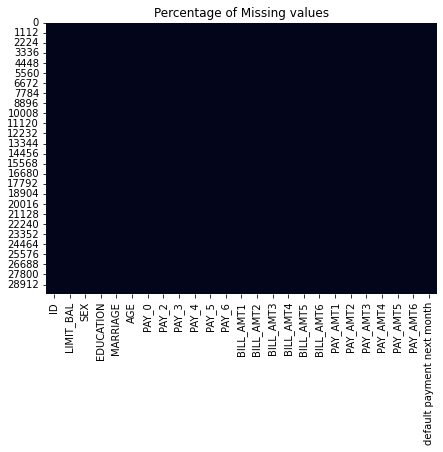

In [172]:
fig,ax=plt.subplots(figsize=(7,5))
sns.heatmap(df.isnull(),cbar= False, ax=ax)
plt.title("Percentage of Missing values")
plt.show()

In [173]:
#checking for any duplicates
len(df[df.duplicated()])

0

In [174]:
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace= True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [175]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [176]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


In [177]:
#Checking value counts of IsDefaulter
df['IsDefaulter'].value_counts()

No     23364
Yes     6636
Name: IsDefaulter, dtype: int64

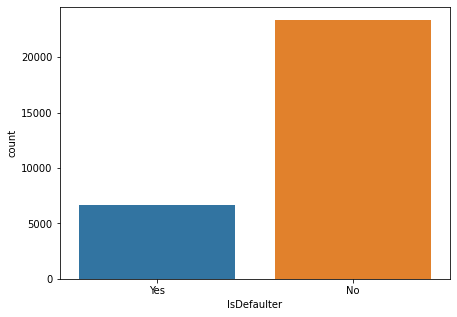

In [178]:
#values count plot of IsDefaulter
plt.figure(figsize=(7,5))
sns.countplot(x = 'IsDefaulter', data = df )
plt.show()

Here we can see that, Defaulters are less as compare to the Non-Defaulters in the given dataset. And also we can see that both classes are not in proportion that is we have imbalanced dataset

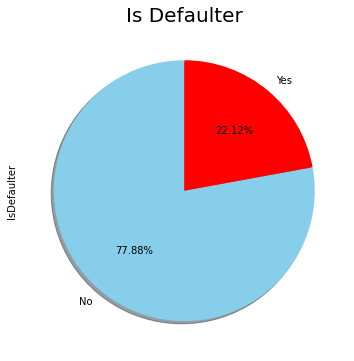

In [179]:
#Visualization
df['IsDefaulter'].value_counts().plot(kind='pie', figsize=(20,6),autopct="%1.2f%%",startangle=90, shadow= 'true',colors=['skyblue','red'],
                                      labels=['No','Yes'],)
plt.title('Is Defaulter',fontsize=20)
plt.show()

In [180]:
#Checking value counts of SEX
df['SEX'].value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

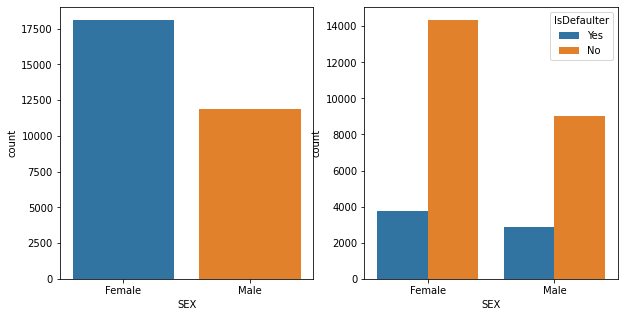

In [181]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df )
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)
plt.show()

Female credit card holders are larger than male credit cards holders.

As the number of female credit card holder is larger than male, their credit card defaults are also higher than male

In [182]:
#category wise values
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

In education column we can clearly see that values such as 5,6 and 0 are unknown. So, lets replace those values as others.

In [183]:
#replacing values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

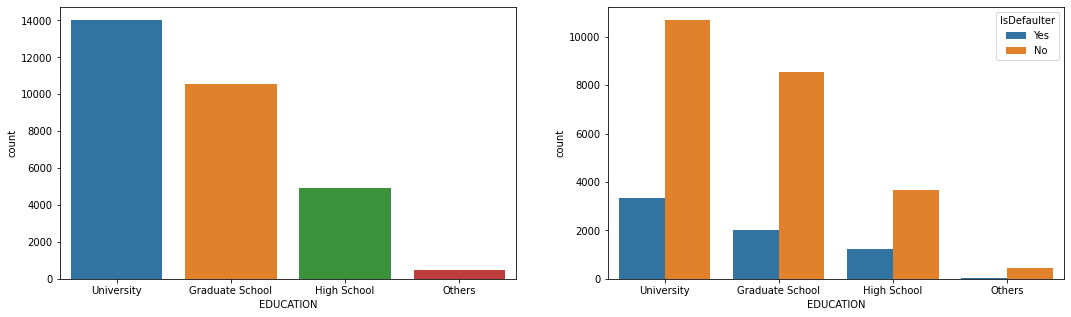

In [184]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, ax = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = ax[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = ax[1], data = df)
plt.show()

University and graduate school has maximum credit card holder.

As the number of university and graduate school credit card holder is higher their credit card default are also higher.

In [185]:
#category wise values
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

In marriage column, 0 values are not known. So we Combine these values in others category.

In [186]:
#replacing 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

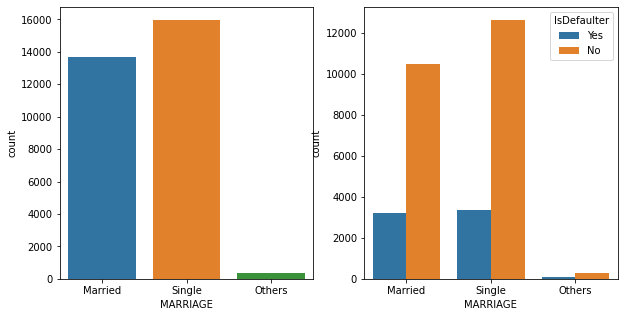

In [187]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df )
plt.show()

Number of credit card holder is maximum in singles.

But credit card defaults are almost same in case of single and married people.

In [188]:
#age wise values of credit card holder
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

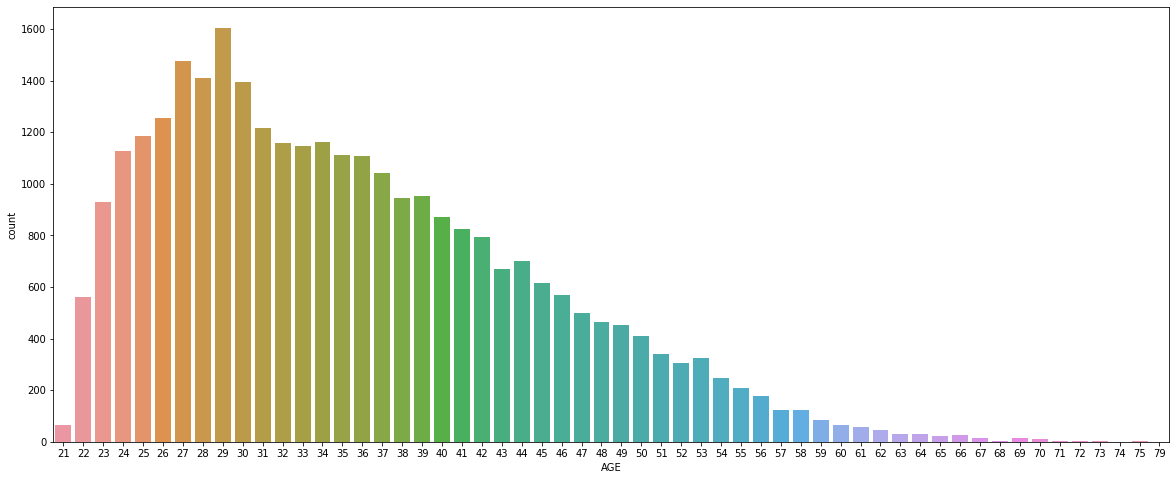

In [189]:
# plotting values count for AGE 
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

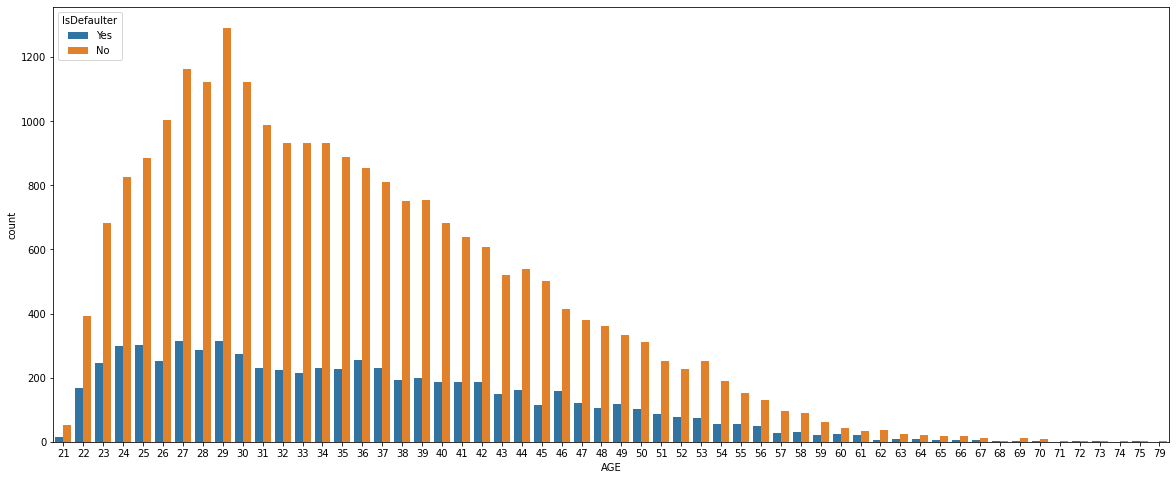

In [190]:
#plotting values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

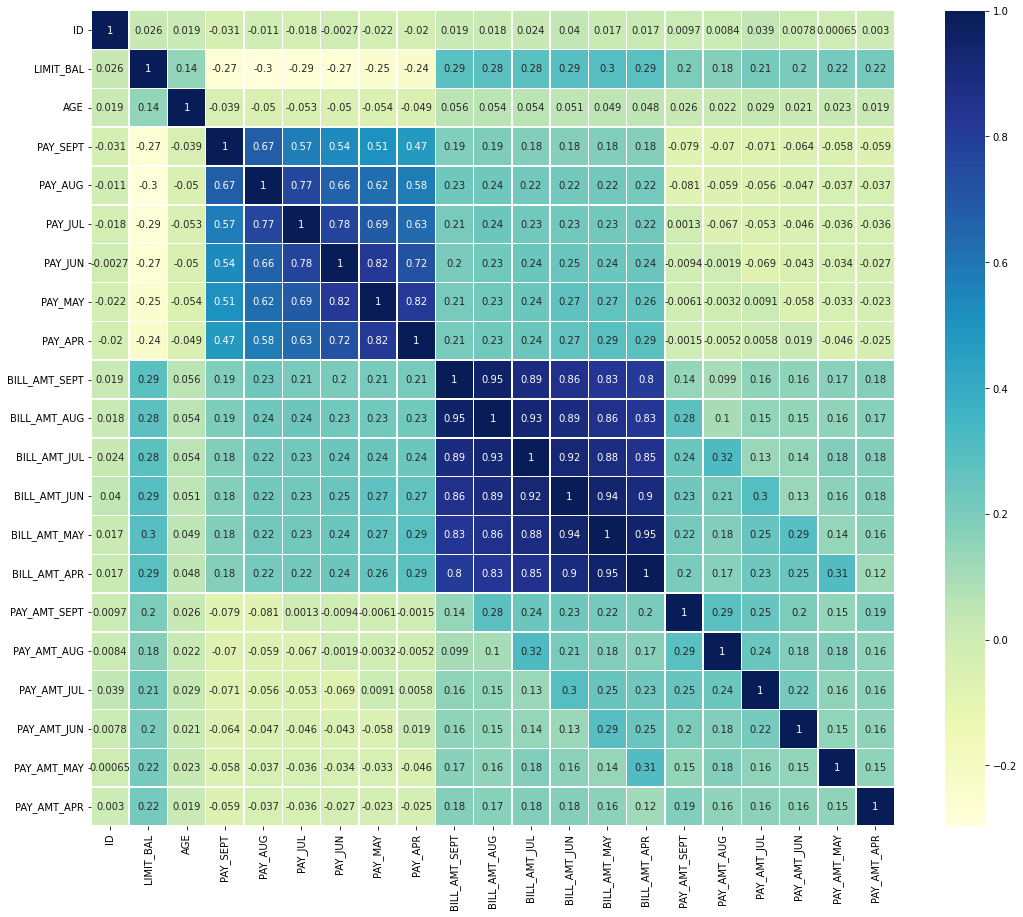

In [191]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=.5)
plt.show()

### Label Encoding

In [192]:
#Label encoding
label_encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1, "No":0}}

df = df.replace(label_encoders_nums)

In [193]:
#checking for changed labels
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,Graduate School,Single,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,Graduate School,Single,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,0,University,Single,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,0,High School,Married,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,High School,Single,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [194]:
#creating dummy variables
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [195]:
df.shape

(30000, 30)

In [196]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [197]:
df.shape

(30000, 28)

In [198]:
#creating dummy variables by droping first variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True)

In [199]:
df.shape

(30000, 80)

In [200]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,0,1,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,0,1,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,0,1,0,0,0,0,0,0,0


### Handling Class Imbalance
SMOTE - Synthetic Minority Oversampling Technique

In [201]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

In [202]:
smote = SMOTE()

In [203]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

In [204]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [205]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [206]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

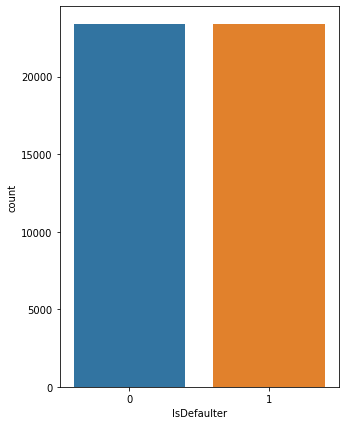

In [207]:
#checking for class imbalance
plt.figure(figsize=(5,7))
sns.countplot('IsDefaulter', data = balanced_df )
plt.show()

In [208]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [209]:
#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [210]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,1,0,0,0,0,0,0,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [211]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [212]:
X.shape

(46728, 78)

In [213]:
y.shape

(46728,)

### Train Test Splitting

In [214]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [215]:
X_train.shape

(37382, 78)

In [216]:
X_test.shape

(9346, 78)

### Data Transformation

In [217]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# We'll need some metrics to evaluate our models
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

## Model Implementation


##Logistic Regression Model

In [218]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

In [219]:
#fitting data into Logistic Regression
logregg = LogisticRegression(fit_intercept=True, max_iter=10000)
logregg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [220]:
#class prediction of y
y_pred_logi = logregg.predict(X_test)
y_train_pred_logi=logregg.predict(X_train)

In [221]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 2)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 2)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 2)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 2)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 2)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 2)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.83
The accuracy on test data is  0.83
The precision on test data is  0.79
The recall on test data is  0.86
The f1 on test data is  0.82
The roc_score on test data is  0.83


[[4057  616]
 [ 961 3712]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

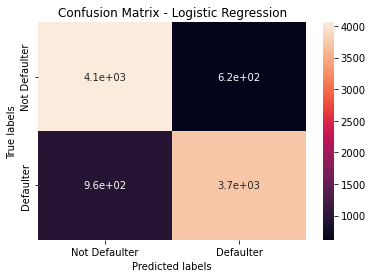

In [222]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### Decision Tree Classification

In [223]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [224]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [225]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [226]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.792
The precision on test data is  0.806
The recall on test data is  0.784
The f1 on test data is  0.795
The roc_score on test data is  0.792


[[3636 1037]
 [ 906 3767]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

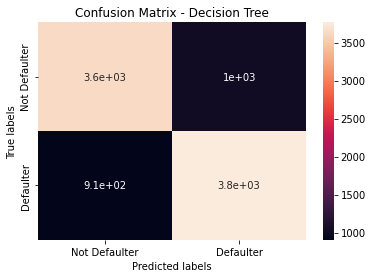

In [227]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Naive Bayes 

In [228]:
from sklearn.naive_bayes import GaussianNB
classifier3 = GaussianNB()
classifier3.fit( X_train, y_train )
y_pred = classifier3.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for NBClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresNB = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean NaiveBayes CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresNB.mean(), scoresNB.std() ))



Accuracy on Test Set for NBClassifier = 0.53
Mean NaiveBayes CrossVal Accuracy on Train Set 0.54, with std=0.03


## K-NEIGHBOURS 

In [229]:
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors=5)
classifier4.fit( X_train, y_train )
y_pred = classifier4.predict( X_test )
cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for KNeighborsClassifier = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresKN = cross_val_score( classifier3, X_train, y_train, cv=10)
print("Mean KN CrossVal Accuracy on Train Set Set %.2f, with std=%.2f" % (scoresKN.mean(), scoresKN.std() ))

Accuracy on Test Set for KNeighborsClassifier = 0.83
Mean KN CrossVal Accuracy on Train Set Set 0.54, with std=0.03


## kernel SVM 

Accuracy on Test Set for kernel-SVM = 0.84
[[4270  403]
 [1072 3601]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

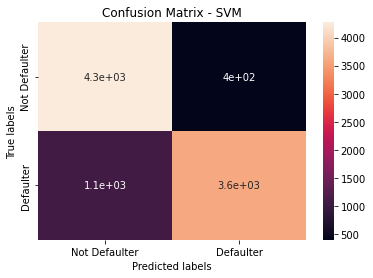

In [230]:
from sklearn.svm import SVC
classifier1 = SVC(kernel="rbf")
classifier1.fit( X_train, y_train )
y_pred = classifier1.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for kernel-SVM = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))

# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, y_pred )
print(cm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)


# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Random Forest 

Accuracy on Test Set for RandomForest = 0.85
Mean RandomForest CrossVal Accuracy on Train Set 0.85, with std=0.01
[[4207  466]
 [ 909 3764]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

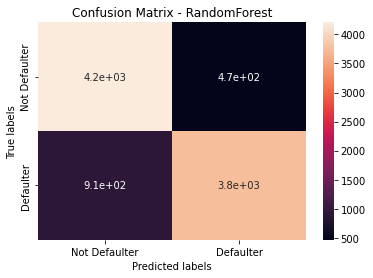

In [231]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10)
classifier.fit( X_train, y_train )
y_pred = classifier.predict( X_test )

cm = confusion_matrix( y_test, y_pred )
print("Accuracy on Test Set for RandomForest = %.2f" % ((cm[0,0] + cm[1,1] )/len(X_test)))
scoresRF = cross_val_score( classifier, X_train, y_train, cv=10)
print("Mean RandomForest CrossVal Accuracy on Train Set %.2f, with std=%.2f" % (scoresRF.mean(), scoresRF.std() ))

# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, y_pred )
print(cm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - RandomForest')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Conclusion: Using a RandomForest classifier, we can predict with ~85% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months).

Demographics: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.